In [2]:
#!pip uninstall matplotlib
#!pip install matplotlib

In [1]:
import matplotlib 

print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats as s

# **1. Exploratory Data Analysis**

### Calender

**Importing calender data**

In [3]:
cal=pd.read_csv('http://data.insideairbnb.com/united-states/wa/seattle/2022-06-15/data/calendar.csv.gz')
cal.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1953840,33448826,2023-06-10,t,$335.00,$335.00,2,1125
1953841,33448826,2023-06-11,t,$335.00,$335.00,2,1125
1953842,33448826,2023-06-12,t,$335.00,$335.00,2,1125
1953843,33448826,2023-06-13,t,$335.00,$335.00,2,1125
1953844,33448826,2023-06-14,t,$335.00,$335.00,2,1125


In [4]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953845 entries, 0 to 1953844
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 104.3+ MB


In [5]:
cal.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [6]:
#cal.dropna(inplace=True)

cal['adjusted_price']=cal['adjusted_price'].astype(str).apply(lambda x:x[1:]).apply(lambda x:re.sub(r',','',x))
cal['adjusted_price']=cal['adjusted_price'].astype(float)

cal['price']=cal['price'].astype(str).apply(lambda x:x[1:]).apply(lambda x:re.sub(r',','',x))
cal['price']=cal['price'].astype(float)

In [7]:
cal.corr()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
listing_id,1.000000,0.079671,0.080059,0.142949,-0.131581
price,0.079671,1.000000,0.999443,0.000239,-0.027514
adjusted_price,0.080059,0.999443,1.000000,0.000562,-0.027463
minimum_nights,0.142949,0.000239,0.000562,1.000000,0.153737
maximum_nights,-0.131581,-0.027514,-0.027463,0.153737,1.000000


price and adjusted_price have strong positive correlation.

In [8]:
cal['available']=cal['available'].apply(lambda x: 1 if x=='t' else 0)

In [9]:
cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,580365544480383496,2022-06-15,0,108.0,108.0,2,1125
1,580365544480383496,2022-06-16,0,177.0,177.0,2,1125
2,580365544480383496,2022-06-17,0,193.0,193.0,2,1125
3,580365544480383496,2022-06-18,0,193.0,193.0,2,1125
4,580365544480383496,2022-06-19,0,193.0,193.0,2,1125


In [10]:
cal.describe()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,1.953845e+06,1.953845e+06,1.953845e+06,1.953845e+06,1.953845e+06,1.953845e+06
mean,8.581482e+16,4.692378e-01,2.012934e+02,2.010600e+02,5.217751e+01,8.215125e+02
std,2.095459e+17,4.990529e-01,1.702995e+02,1.701860e+02,1.652444e+02,4.711195e+02
min,6.606000e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00
25%,2.098306e+07,0.000000e+00,1.080000e+02,1.080000e+02,2.000000e+00,3.650000e+02
50%,4.267289e+07,0.000000e+00,1.590000e+02,1.590000e+02,3.000000e+00,1.125000e+03
75%,5.233190e+07,1.000000e+00,2.470000e+02,2.460000e+02,3.000000e+01,1.125000e+03
max,6.484045e+17,1.000000e+00,6.035000e+03,6.035000e+03,7.300000e+02,1.000000e+04


In [11]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953845 entries, 0 to 1953844
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       int64  
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  int64  
 6   maximum_nights  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 104.3+ MB


**date vs price**

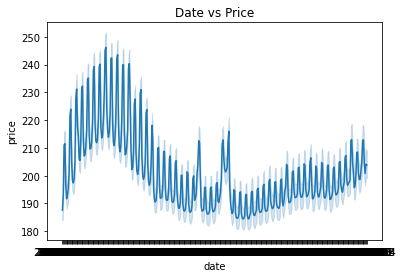

In [12]:
sns.lineplot(data=cal, x="date", y="price")
plt.xlabel('date')
plt.ylabel('price')
plt.title('Date vs Price')
plt.show()

Graph shows some seasonal trend which can be clearly seen by monthwise price

**Monthwise price**

In [13]:
def getMMYYYY(x):
    d=x.split('-')
    return d[1]+'/'+d[0]
cal['mm-yyyy']=cal['date'].apply(lambda x:getMMYYYY(x))

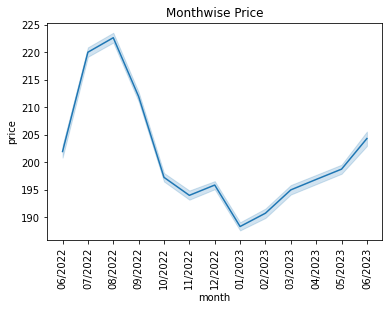

In [14]:
#price and adjusted price have strong positive correlation, so price is choosen
sns.lineplot(data=cal, x="mm-yyyy", y="price")
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('price')
plt.title('Monthwise Price')
plt.show()

Pattern observed from 06/2022 to 12/2022 may repeat next year as inferred from graph

The best time to visit Seattle is from June to early October. Summer marks the city's high season, meaning room rates rise and availability drops, while cold winter weather can deter even the most avid sightseers. After January winter ends and beginning of Spring marks the rising rates of AirBnb.

**Monthwise availability**

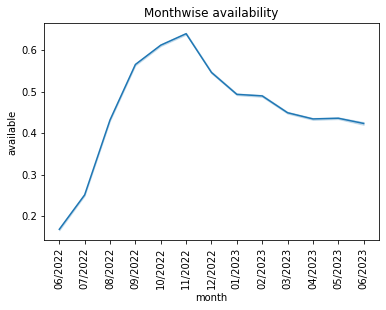

In [15]:
sns.lineplot(data=cal, x="mm-yyyy", y="available")
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('available')
plt.title('Monthwise availability')
plt.show()

Summer marks the city's high season, meaning room rates rise and availability drops, from June to November. While cold winter weather starts tourists descrease and rooms availability increases.

**Weekday graph**

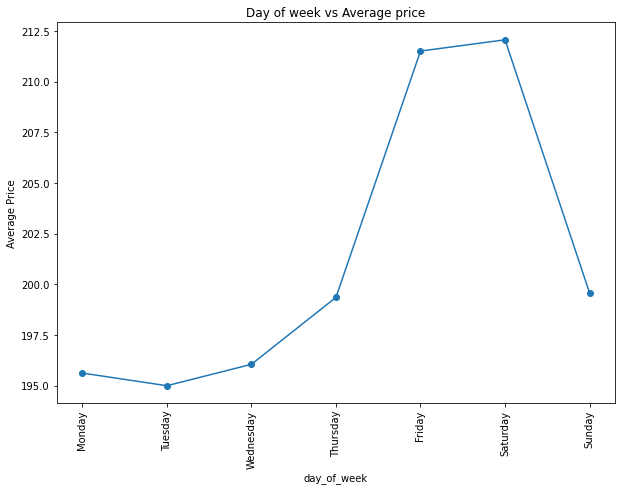

In [16]:
from pandas.api.types import CategoricalDtype

cal['date'] = pd.to_datetime(cal['date'])

cal['day_of_week'] = cal['date'].dt.day_name()
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
cal['day_of_week'] = cal['day_of_week'].astype(cat_type)
week=cal.groupby('day_of_week').price.mean().reset_index().rename(columns={'price':'average_price'})

plt.figure(figsize=(10,7))
plt.plot(week['day_of_week'],week['average_price'],marker='o')
plt.xticks(rotation=90)
plt.xlabel('day_of_week')
plt.ylabel('Average Price')
plt.title('Day of week vs Average price')
plt.show()

**Price distribution**

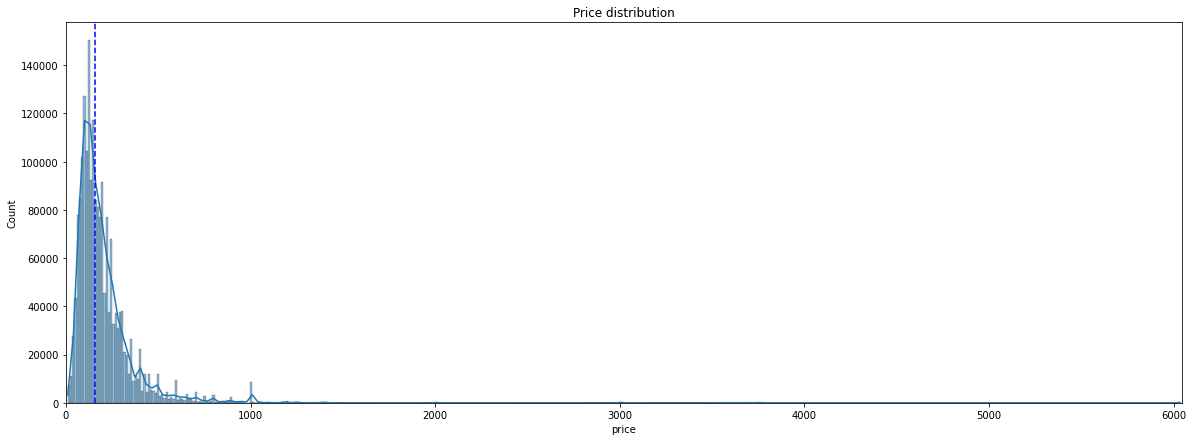

In [17]:
plt.figure(figsize=(20,7))
sns.histplot(data=cal, x="price",bins=500,kde=True)
plt.xlim(0,cal['price'].max()+10 )
plt.axvline(np.median(cal['price']),color='b', linestyle='--')
plt.title('Price distribution')
plt.show()

Price distribution has positively skewed distribution. Most of the people prefer rooms with lower prices.

**Frequently booked price of room**

In [18]:
s.mode(cal['price'])

ModeResult(mode=array([150.]), count=array([37063]))

Rooms with price $150 are booked most frequently.

### Listings

**Importing listings data**

In [19]:
listings_link='http://data.insideairbnb.com/united-states/wa/seattle/2022-06-15/data/listings.csv.gz'
lst = pd.read_csv(listings_link)

In [20]:
lst.tail()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5350,16733665,https://www.airbnb.com/rooms/16733665,20220615002636,2022-06-15,Quiet 2BR Townhouse in Bustling Eastlake,"This is a two bedroom, three bathroom townhous...",Eastlake is a fun neighborhood with something ...,https://a0.muscache.com/pictures/620b8144-c90e...,36390224,https://www.airbnb.com/users/show/36390224,...,5.00,4.90,4.87,STR-OPLI-19-002743,f,1,1,0,0,0.48
5351,25846790,https://www.airbnb.com/rooms/25846790,20220615002636,2022-06-15,Peaceful Home! Great Location!,Amazing location! <br />The house has charm. M...,Great location! Easily accessible to frwy exi...,https://a0.muscache.com/pictures/c08af974-484f...,3903741,https://www.airbnb.com/users/show/3903741,...,5.00,4.73,4.67,NaN,f,1,1,0,0,0.31
5352,49692446,https://www.airbnb.com/rooms/49692446,20220615002636,2022-06-15,Home away from home,"Walking distance from Starbucks, parks around,...","Parking right in front of home, close to parks...",https://a0.muscache.com/pictures/665e7eca-cfbc...,268690467,https://www.airbnb.com/users/show/268690467,...,5.00,4.00,4.33,NaN,t,1,1,0,0,0.28
5353,587785014993543336,https://www.airbnb.com/rooms/587785014993543336,20220615002636,2022-06-15,Kirkland placid community,Have a Relax And quiet stay at this comfortabl...,o o denny park<br />Juanita Woodlands Park<br ...,https://a0.muscache.com/pictures/db9da635-18a0...,448872479,https://www.airbnb.com/users/show/448872479,...,4.93,4.71,4.79,NaN,t,1,1,0,0,5.49
5354,53475139,https://www.airbnb.com/rooms/53475139,20220615002636,2022-06-15,Alki Beach 1-Bedroom Cozy Retreat,Charming waterside Alki Beach condo located ju...,NaN,https://a0.muscache.com/pictures/80a21d8e-5469...,433024286,https://www.airbnb.com/users/show/433024286,...,5.00,5.00,4.50,NaN,t,1,1,0,0,1.02


In [21]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355 entries, 0 to 5354
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5355 non-null   int64  
 1   listing_url                                   5355 non-null   object 
 2   scrape_id                                     5355 non-null   int64  
 3   last_scraped                                  5355 non-null   object 
 4   name                                          5355 non-null   object 
 5   description                                   5348 non-null   object 
 6   neighborhood_overview                         4000 non-null   object 
 7   picture_url                                   5355 non-null   object 
 8   host_id                                       5355 non-null   int64  
 9   host_url                                      5355 non-null   o

**Removing $ and , from price**

In [22]:
lst['price']=lst['price'].astype(str).apply(lambda x:x[1:]).apply(lambda x:re.sub(r',','',x))
lst['price']=lst['price'].astype(float)

**Top 5 host locations**

In [23]:
if listings_link.split('/')[5]=='seattle':
  lst.loc[lst['host_location']=='  and Seattle Washington and Montezuma,Costa Rica','host_location']='Seattle Washington and Montezuma,Costa Rica'

host_loc_group = lst['host_location'].value_counts().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'host_location','host_location':'count'})

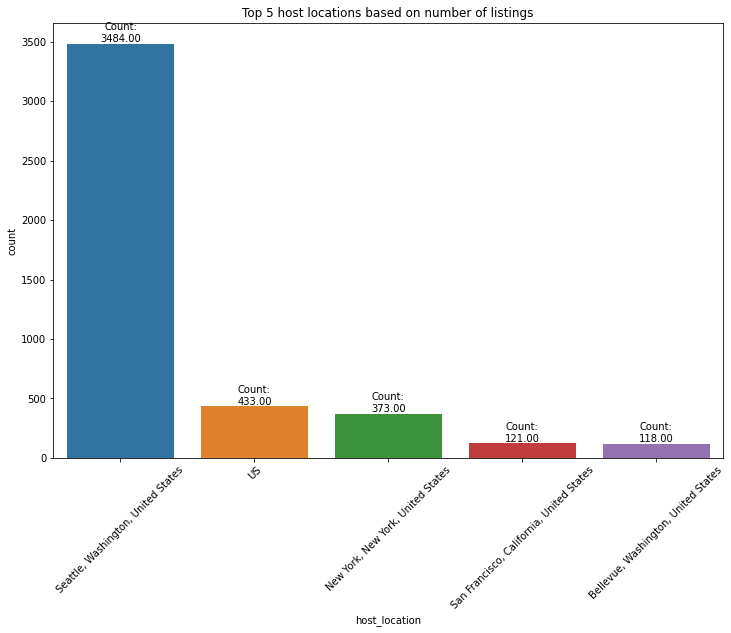

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='host_location', y='count', data=host_loc_group, ax=ax)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
ax.set(ylabel='count')
plt.xticks(rotation=45)
plt.title('Top 5 host locations based on number of listings')
plt.show()

Maximum hosts are from Seattle, Washington.

**Host response time frequencies**

In [25]:
lst['host_response_time'].value_counts(dropna=False)

within an hour        4044
within a few hours     523
NaN                    493
within a day           237
a few days or more      58
Name: host_response_time, dtype: int64

In [26]:
##selecting and replacing NaN values with 'Not available'
   
lst['host_response_time'].fillna('Not available',inplace=True)

In [27]:
lst['host_response_time'].value_counts(dropna=False)

within an hour        4044
within a few hours     523
Not available          493
within a day           237
a few days or more      58
Name: host_response_time, dtype: int64

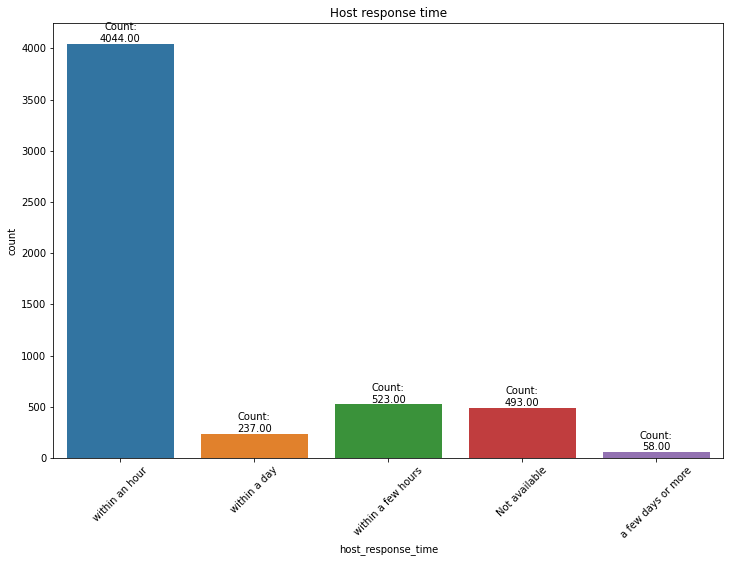

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(x=lst["host_response_time"])
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
ax.set(ylabel='count')
plt.xticks(rotation=45)
plt.title('Host response time')
plt.show()

Most reponses are served within an hour.

**Top 5 Host response rates**

In [29]:
lst.loc[lst['host_response_rate'].isnull(),'host_response_rate']='unknown'

top_5_res_rate = lst['host_response_rate'].value_counts().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'reponse_rate','host_response_rate':'count'})
top_5_res_rate

,reponse_rate,count
0,100%,3910
1,unknown,493
2,99%,227
3,97%,114
4,90%,109


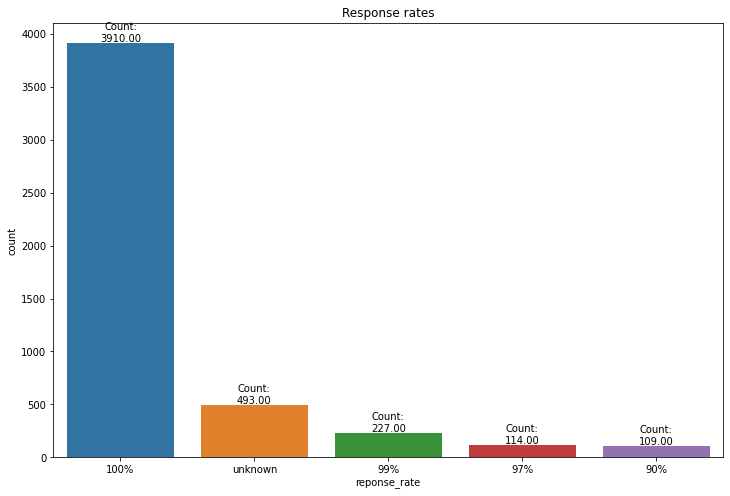

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='reponse_rate', y='count', data=top_5_res_rate, ax=ax)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
ax.set(ylabel='count')
plt.title('Response rates')
plt.show()

Most of the hosts respond almost to every user for booking requests.

**Top 5 Host acceptance rates**

In [31]:
lst['host_acceptance_rate'].unique()

array(['92%', '0%', '64%', '88%', '93%', '70%', '100%', '60%', '50%',
       '73%', '98%', nan, '99%', '90%', '95%', '87%', '17%', '94%', '58%',
       '71%', '56%', '80%', '91%', '97%', '33%', '89%', '20%', '96%',
       '67%', '24%', '85%', '78%', '57%', '75%', '14%', '77%', '81%',
       '79%', '86%', '25%', '62%', '76%', '39%', '69%', '68%', '47%',
       '83%', '63%', '84%', '52%', '55%', '74%', '82%', '61%', '40%',
       '6%', '54%', '53%', '72%', '5%', '66%', '46%', '43%', '3%', '41%',
       '65%', '10%', '35%'], dtype=object)

In [32]:
#Replacing NaN with Not available
lst.loc[lst['host_acceptance_rate'].isnull(),'host_acceptance_rate']='Not available'
lst[lst['host_acceptance_rate'].isnull()]['id'].count()

top_5_acc_rate = lst['host_acceptance_rate'].value_counts().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'acceptance_rate','host_acceptance_rate':'count'})
top_5_acc_rate

,acceptance_rate,count
0,100%,2120
1,98%,701
2,99%,500
3,Not available,346
4,97%,193


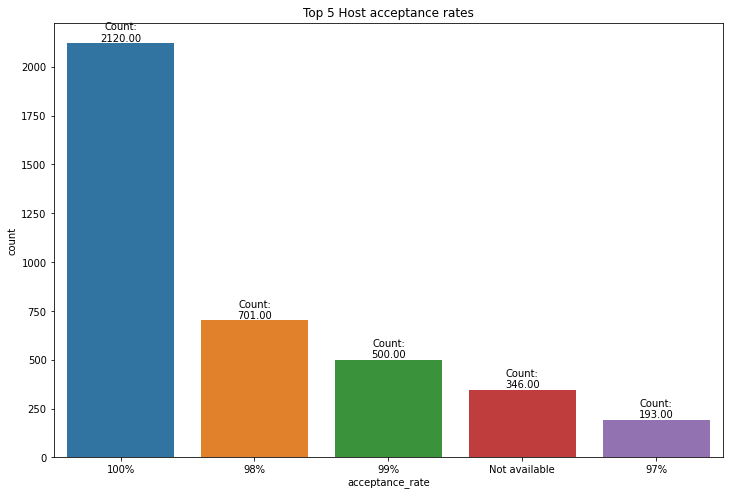

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='acceptance_rate', y='count', data=top_5_acc_rate, ax=ax)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
ax.set(ylabel='count')
plt.title('Top 5 Host acceptance rates')
plt.show()

Most hosts accept every user request.

**Superhost**

In [34]:
lst['host_is_superhost'].value_counts(normalize=True)*100

f    59.589169
t    40.410831
Name: host_is_superhost, dtype: float64

Almost 40% hosts are superhosts.

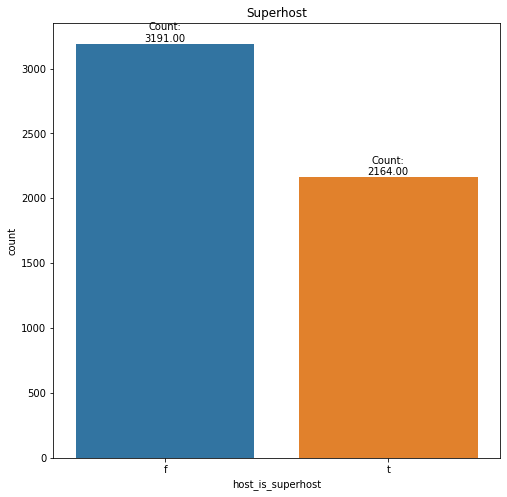

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.countplot(data=lst,x='host_is_superhost')
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
plt.title('Superhost')
plt.show()

2164 i.e 40% hosts are superhosts.

Every 3 months, each host is evaluated on their hospitality.
Superhosts should meet all of the criteria
- 4.8+ overall rating
- 10+ stays
- <1% cancellation rate
- 90% response rate

**Top 5 host neighbourhoods**

In [36]:
top_5_host_neighbourhood=lst['host_neighbourhood'].value_counts(ascending=False)[:5].reset_index().rename(columns={'index':'host_neighbourhood','host_neighbourhood':'count'})
top_5_host_neighbourhood

,host_neighbourhood,count
0,Capitol Hill,357
1,Cambridge,308
2,Minor,235
3,West Seattle,204
4,Wallingford,192


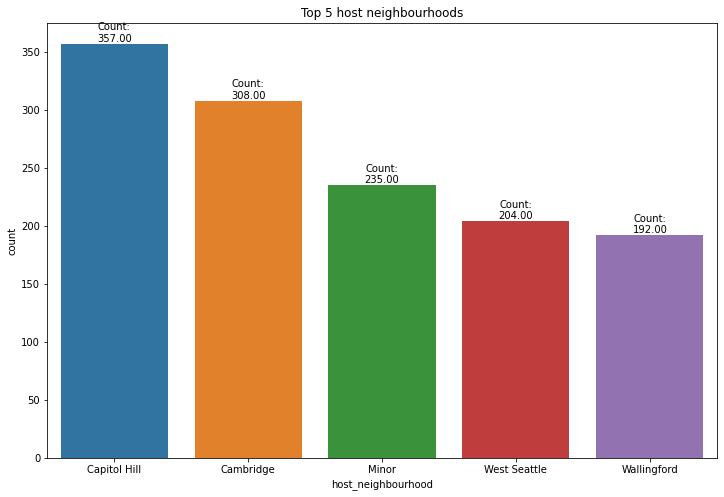

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='host_neighbourhood', y='count', data=top_5_host_neighbourhood, ax=ax)
ax.bar_label(ax.containers[-1], fmt='Count:\n%.2f', label_type='edge')
ax.set(ylabel='count')
plt.title('Top 5 host neighbourhoods')
plt.show()

Capitol Hill, Cambridge, Minor, West Seattle and Wallingford are top neighborhoods around which hosts are located.

**Host verifications**

In [38]:
lst['host_verifications'].value_counts(normalize=True)*100

['email', 'phone']                  73.202614
['email', 'phone', 'work_email']    21.942110
['phone']                            4.481793
['phone', 'work_email']              0.242764
['email']                            0.130719
Name: host_verifications, dtype: float64

73% verifications are done through email or phone.

**Host identity verified**

In [39]:
lst['host_identity_verified'].value_counts(normalize=True)*100

t    87.077498
f    12.922502
Name: host_identity_verified, dtype: float64

In [40]:
host_identity = lst['host_identity_verified'].value_counts(normalize=True)*100

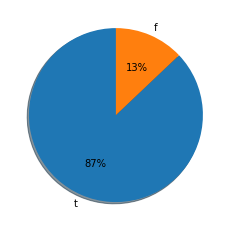

In [41]:
plt.pie(host_identity, labels=host_identity.index,
   autopct=lambda p: '{:.0f}%'.format(p * sum(host_identity) / 100),
   shadow=True, startangle=90)

plt.show()

Almost 87% hosts have verified their identity.

**Top 10 Property types offerred by hosts**

In [42]:
lst['property_type'].value_counts()[:10]

Entire rental unit           1263
Entire home                  1133
Entire guest suite            672
Entire condo                  497
Private room in home          490
Entire townhouse              385
Entire guesthouse             219
Entire serviced apartment     175
Private room in townhouse      94
Room in boutique hotel         68
Name: property_type, dtype: int64

**room types**

In [43]:
lst['room_type'].value_counts(normalize=True)*100

Entire home/apt    84.369748
Private room       14.920635
Shared room         0.672269
Hotel room          0.037348
Name: room_type, dtype: float64

Almost 84% offerings are of Entire home/apt.

**bedroom vs bed**

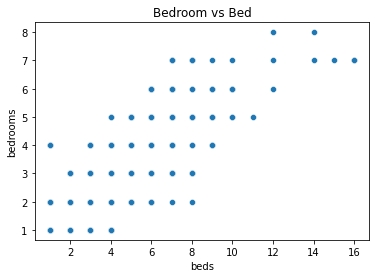

In [44]:
sns.scatterplot(x='beds',y='bedrooms',data=lst)
plt.xlabel('beds')
plt.ylabel('bedrooms')
plt.title('Bedroom vs Bed')
plt.show()

In [45]:
lst[['beds','bedrooms']].corr()

,beds,bedrooms
beds,1.00000,0.84788
bedrooms,0.84788,1.00000


beds and bedroom are strongly positively correlated.

**Average Price per Host location**

In [46]:
per_host=pd.DataFrame(index=lst.groupby('host_location')['price'].count().sort_index().index)
per_host['avg_price']=lst.groupby('host_location')['price'].mean().sort_index()
per_host['count']=lst.groupby('host_location')['price'].count().sort_index()

per_host = per_host.sort_values('count',ascending=False)[:5].reset_index()
per_host

,host_location,avg_price,count
0,"Seattle, Washington, United States",183.609644,3484
1,US,223.842956,433
2,"New York, New York, United States",176.134048,373
3,"San Francisco, California, United States",219.603306,121
4,"Bellevue, Washington, United States",263.669492,118


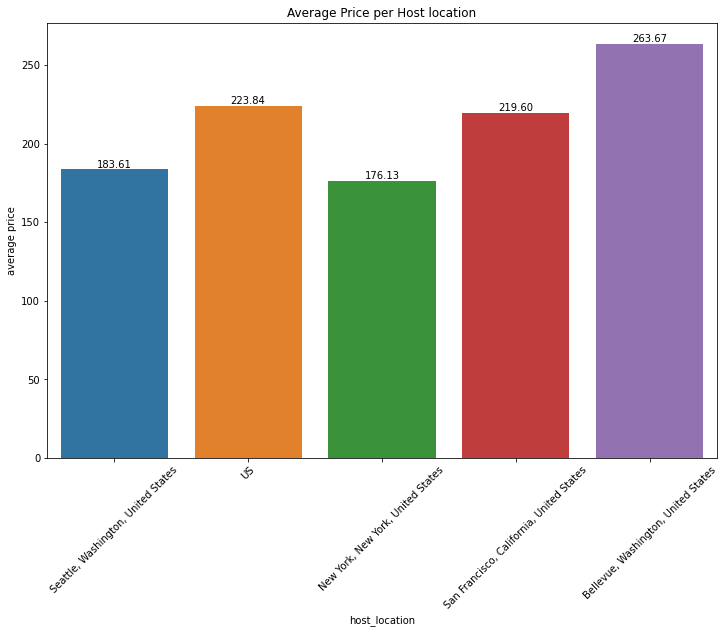

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='host_location', y='avg_price', data=per_host, ax=ax)
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='edge')
ax.set(ylabel='average price')
plt.xticks(rotation=45)
plt.title('Average Price per Host location')
plt.show()

**Price by ratings**

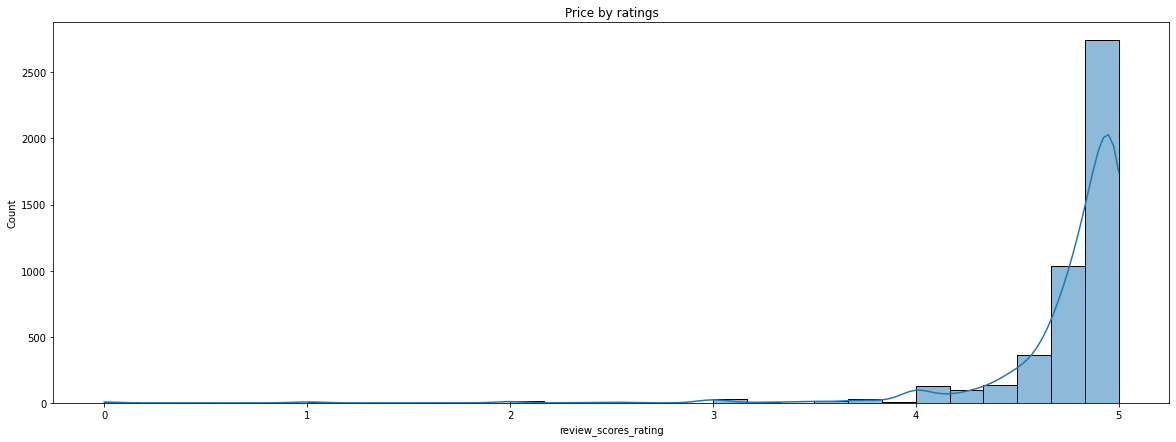

In [48]:
price_by_rating = lst[~lst['review_scores_rating'].isnull()][['review_scores_rating','price']]

plt.figure(figsize=(20,7))
sns.histplot(data=price_by_rating, x="review_scores_rating",bins=30,kde=True)
plt.title('Price by ratings')
plt.show()

In [49]:
price_by_rating['review_scores_rating'].value_counts().sort_values(ascending=False)

5.00    961
4.96    159
4.94    142
4.92    140
4.93    131
       ... 
3.57      1
3.88      1
3.87      1
3.14      1
4.26      1
Name: review_scores_rating, Length: 125, dtype: int64

Top rating provided is 5 for almost 961 hosts.

**Reviews**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


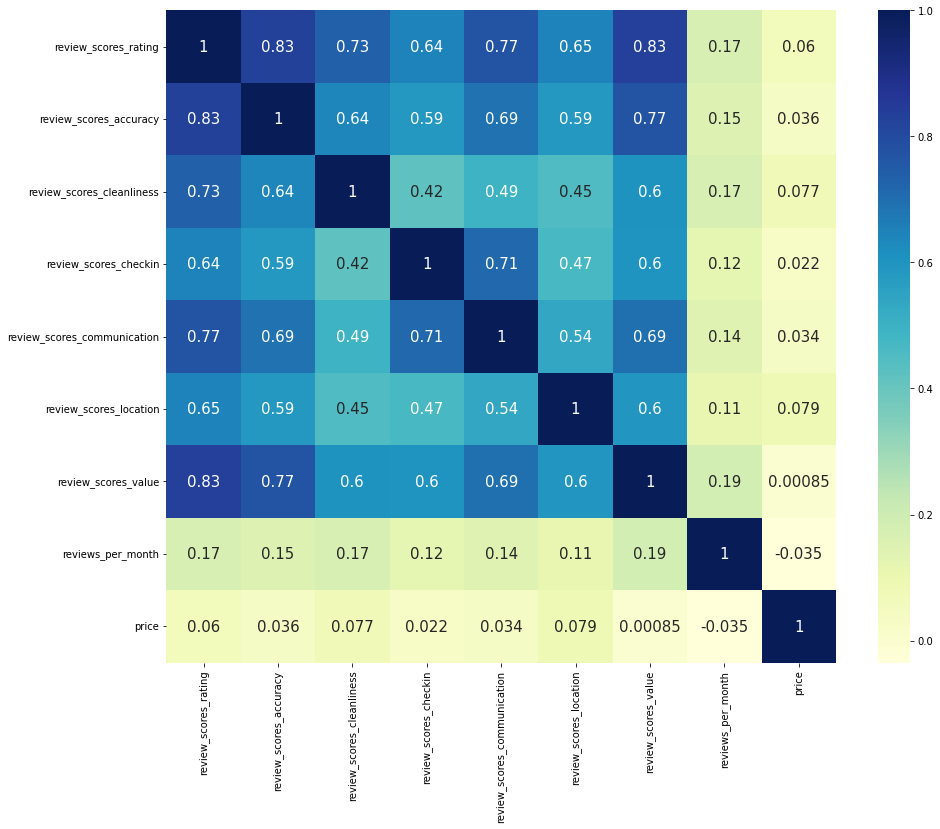

In [50]:
reviews = lst.filter(regex=r'^review',axis=1)
reviews['price']=lst.price

plt.figure(figsize=(15,12))
sns.heatmap(reviews.corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 15},cbar=True)
plt.show()

review_score_rating have positive correlation with review_scores_accuracy and review_scores_value

# **2. Data Preprocessing**

In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

In [ ]:
calendar_df=pd.read_csv('http://data.insideairbnb.com/united-states/wa/seattle/2022-06-15/data/calendar.csv.gz')
listings_link='http://data.insideairbnb.com/united-states/wa/seattle/2022-06-15/data/listings.csv.gz'
listings_df = pd.read_csv(listings_link)


In [ ]:
listings_df['price'] = listings_df['price'].map(lambda x: x.lstrip("$").replace(",", "")).astype(float)
calendar_df['price'] = calendar_df['price'].astype(str).map(lambda x: x.lstrip("$").replace(",", "")).astype(float)

In [ ]:
calendar_df['available'] = calendar_df['available'].map({'t':1, 'f':0})
calendar_df['revenue'] = calendar_df['price']*calendar_df['available']

In [ ]:
calendar_df = calendar_df.fillna(0)
overview = calendar_df.groupby('listing_id').mean()
overview['daily_revenue'] = overview['revenue']
overview['booking_rate(%)'] = overview['available']*100

In [ ]:
calendar_booked = calendar_df[calendar_df['price']!=0]
calendar_booked = calendar_booked.groupby('listing_id').agg({'price':['mean','std']}).reset_index()
calendar_booked.columns=['listing_id','price_avg','price_std']

In [ ]:
# Extract money value
def extract_money(text):
    if isinstance(text, str):
        text = text.replace('$','')
        text = text.replace(',','')
        money = float(text.replace('$',''))
    else:
        money=text
    return money

In [ ]:
pricing_strategies = ['price', 'accommodates']

for col in pricing_strategies:
    listings_df[col] = listings_df[col].apply(lambda x: extract_money(x))
listings_df = listings_df.drop('price', axis=1)
overview = overview[['available', 'price', 'revenue',
      'daily_revenue', 'booking_rate(%)']]
listings_df = pd.merge(listings_df, overview, how='left', left_on='id', right_on='listing_id')
listings_df = pd.merge(listings_df, calendar_booked, how='left', left_on='id', right_on='listing_id')
listings_df['price_per_person'] = listings_df['price'] / listings_df['accommodates']
listings_df = listings_df.drop(['listing_id'], axis=1)

In [ ]:
listings_df.isnull().sum()

id                  0
listing_url         0
scrape_id           0
last_scraped        0
name                0
                   ..
daily_revenue       2
booking_rate(%)     2
price_avg           2
price_std           2
price_per_person    2
Length: 81, dtype: int64

### Knowledge-based feature

In [ ]:
listings_df['accom_per_bed'] = listings_df['accommodates']/listings_df['beds']
listings_df['price_surge_percent'] = (listings_df['price_avg']/listings_df['price']-1)*100
#To check abrupt changes in price during peak season
listings_df['price_std_percent'] = listings_df['price_std']/listings_df['price']*100

In [ ]:
cols='''host_location, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_neighbourhood, host_total_listings_count, host_verifications,host_identity_verified, neighbourhood,
property_type, room_type, bedrooms,minimum_nights,maximum_nights, has_availability, availability_30, number_of_reviews,number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating,review_scores_accuracy,review_scores_cleanliness,	review_scores_checkin,review_scores_communication,	review_scores_location,review_scores_value
, instant_bookable,price,price_avg,price_std, beds,accommodates,reviews_per_month,availability_60,availability_90,availability_365, revenue, booking_rate(%),bathrooms_text, price_per_person,accom_per_bed,price_surge_percent,price_std_percent'''

In [ ]:
columns=[]
for col in cols.split(','):
  columns.append(col.strip())


In [ ]:
cleaned_df=listings_df[columns]

Handling null values

In [ ]:
cleaned_df['host_location']=cleaned_df['host_location'].fillna('host location not available')

In [ ]:
cleaned_df['host_response_rate'] = cleaned_df['host_response_rate'].str.replace('%','').astype('float64')
cleaned_df['host_acceptance_rate'] = cleaned_df['host_acceptance_rate'].str.replace('%','').astype('float64')
cleaned_df['host_response_rate']=cleaned_df['host_response_rate'].fillna(cleaned_df['host_response_rate'].mean())
cleaned_df['host_acceptance_rate']=cleaned_df['host_acceptance_rate'].fillna(cleaned_df['host_acceptance_rate'].mean())

In [ ]:
cleaned_df['host_response_time']=cleaned_df['host_response_time'].fillna('response not available')
cleaned_df['host_is_superhost']=cleaned_df['host_is_superhost'].fillna(cleaned_df['host_is_superhost'].mode()[0])
cleaned_df['host_neighbourhood']=cleaned_df['host_neighbourhood'].fillna('host neighbourhood not available')
cleaned_df['neighbourhood']=cleaned_df['neighbourhood'].fillna('neighbourhood not available')

In [ ]:
cleaned_df['bedrooms']=cleaned_df['bedrooms'].fillna(cleaned_df['bedrooms'].mean())
cleaned_df['review_scores_rating']=cleaned_df['review_scores_rating'].fillna(cleaned_df['review_scores_rating'].mean())
cleaned_df['review_scores_accuracy']=cleaned_df['review_scores_accuracy'].fillna(cleaned_df['review_scores_accuracy'].mean())
cleaned_df['review_scores_cleanliness']=cleaned_df['review_scores_cleanliness'].fillna(cleaned_df['review_scores_cleanliness'].mean())
cleaned_df['review_scores_checkin']=cleaned_df['review_scores_checkin'].fillna(cleaned_df['review_scores_checkin'].mean())
cleaned_df['review_scores_communication']=cleaned_df['review_scores_communication'].fillna(cleaned_df['review_scores_communication'].mean())
cleaned_df['review_scores_location']=cleaned_df['review_scores_location'].fillna(cleaned_df['review_scores_location'].mean())
cleaned_df['review_scores_value']=cleaned_df['review_scores_value'].fillna(cleaned_df['review_scores_value'].mean())
cleaned_df['reviews_per_month']=cleaned_df['reviews_per_month'].fillna(cleaned_df['reviews_per_month'].mean())
cleaned_df['revenue']=cleaned_df['revenue'].fillna(cleaned_df['revenue'].mean())
cleaned_df['booking_rate(%)']=cleaned_df['booking_rate(%)'].fillna(cleaned_df['booking_rate(%)'].mean())
cleaned_df['price_per_person']=cleaned_df['price_per_person'].fillna(cleaned_df['price_per_person'].mean())
cleaned_df['accom_per_bed']=cleaned_df['accom_per_bed'].fillna(cleaned_df['accom_per_bed'].mean())
cleaned_df['price_surge_percent']=cleaned_df['price_surge_percent'].fillna(cleaned_df['price_surge_percent'].mean())
cleaned_df['price_std_percent']=cleaned_df['price_std_percent'].fillna(cleaned_df['price_std_percent'].mean())
####
cleaned_df['price']=cleaned_df['price'].fillna(cleaned_df['price'].mean())
cleaned_df['price_avg']=cleaned_df['price_avg'].fillna(cleaned_df['price_avg'].mean())
cleaned_df['price_std']=cleaned_df['price_std'].fillna(cleaned_df['price_std'].mean())
cleaned_df['beds']=cleaned_df['beds'].fillna(cleaned_df['beds'].mean())

In [ ]:
cleaned_df['bathrooms_text']=cleaned_df['bathrooms_text'].fillna(cleaned_df['bathrooms_text'].mode()[0])

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 5354
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_location                5355 non-null   object 
 1   host_response_time           5355 non-null   object 
 2   host_response_rate           5355 non-null   float64
 3   host_acceptance_rate         5355 non-null   float64
 4   host_is_superhost            5355 non-null   object 
 5   host_neighbourhood           5355 non-null   object 
 6   host_total_listings_count    5355 non-null   int64  
 7   host_verifications           5355 non-null   object 
 8   host_identity_verified       5355 non-null   object 
 9   neighbourhood                5355 non-null   object 
 10  property_type                5355 non-null   object 
 11  room_type                    5355 non-null   object 
 12  bedrooms                     5355 non-null   float64
 13  minimum_nights    

# **3. Insights**

## Top 5 property types for best returns?

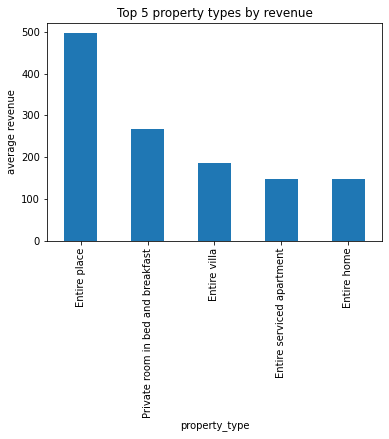

In [ ]:
cleaned_df.groupby("property_type").mean()['revenue'].sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.ylabel('average revenue')
plt.xlabel('property_type')
plt.title('Top 5 property types by revenue')
plt.show()

In [ ]:
cleaned_df.groupby("property_type").mean()['revenue'].sort_values(ascending=False).iloc[:5]

property_type
Entire place                         496.131507
Private room in bed and breakfast    267.558493
Entire villa                         186.445010
Entire serviced apartment            147.674082
Entire home                          146.632533
Name: revenue, dtype: float64

## Top 5 property types with the highest booking rate?

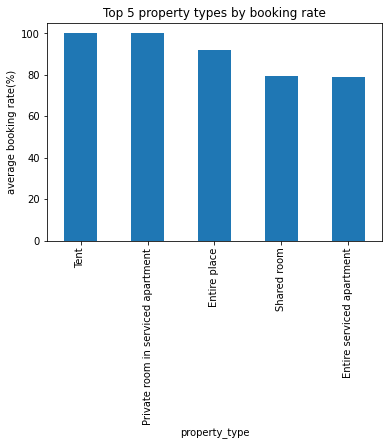

In [ ]:
cleaned_df.groupby("property_type").mean()['booking_rate(%)'].sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.xlabel('property_type')
plt.ylabel('average booking rate(%)')
plt.title('Top 5 property types by booking rate')
plt.show()

In [ ]:
cleaned_df.groupby("property_type").mean()['booking_rate(%)'].sort_values(ascending=False).iloc[:5]

property_type
Tent                                  100.000000
Private room in serviced apartment    100.000000
Entire place                           91.780822
Shared room                            79.315068
Entire serviced apartment              78.897847
Name: booking_rate(%), dtype: float64

## What are the top 5 neighborhoods/areas to invest in based on average revenue?

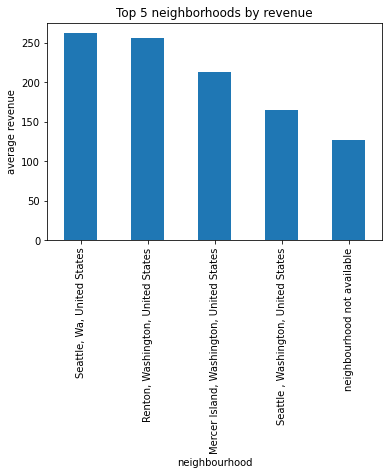

In [ ]:
cleaned_df.groupby('neighbourhood').mean()['revenue'].sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.xlabel('neighbourhood')
plt.ylabel('average revenue')
plt.title('Top 5 neighborhoods by revenue')
plt.show()

In [ ]:
cleaned_df.groupby('neighbourhood').mean()['revenue'].sort_values(ascending=False).iloc[:5]

neighbourhood
Seattle, Wa, United States                  262.194521
Renton, Washington, United States           256.201370
Mercer Island, Washington, United States    213.749315
Seattle , Washington, United States         164.506849
neighbourhood not available                 126.761795
Name: revenue, dtype: float64

## What are the top 5 neighborhoods/areas to invest in based on booking rate?

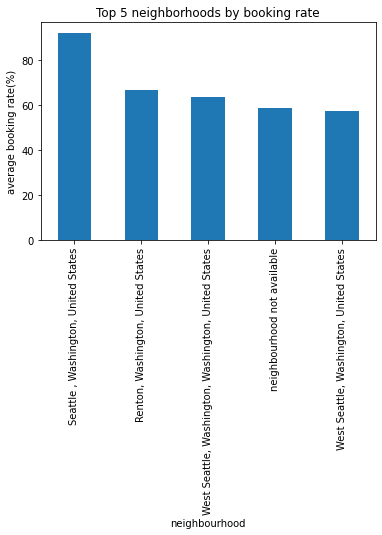

In [ ]:
cleaned_df.groupby('neighbourhood').mean()['booking_rate(%)'].sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.xlabel('neighbourhood')
plt.ylabel('average booking rate(%)')
plt.title('Top 5 neighborhoods by booking rate')
plt.show()

In [ ]:
cleaned_df.groupby('neighbourhood').mean()['booking_rate(%)'].sort_values(ascending=False).iloc[:5]

neighbourhood
Seattle , Washington, United States                    92.328767
Renton, Washington, United States                      66.986301
West Seattle, Washington, Washington, United States    63.835616
neighbourhood not available                            58.646625
West Seattle, Washington, United States                57.534247
Name: booking_rate(%), dtype: float64

## How does maximum number of people per listing affect revenue/booking rate?

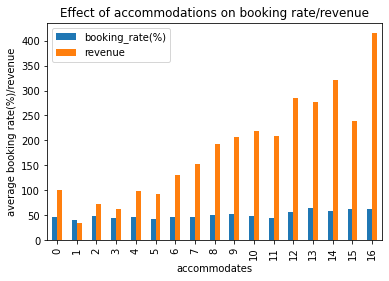

In [ ]:
#plt.figure(figsize =(10,10))
cleaned_df.groupby('accommodates').mean()[['booking_rate(%)','revenue']].plot(kind='bar')
plt.xlabel('accommodates')
plt.ylabel('average booking rate(%)/revenue')
plt.title('Effect of accommodations on booking rate/revenue')
plt.show()

Number of accommodates does not affect booking rate(%) but it affects revenue.

## Effect of verification on booking rate and revenue

<AxesSubplot:xlabel='host_identity_verified'>

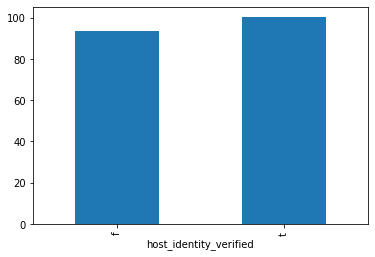

In [ ]:
cleaned_df.groupby('host_identity_verified').mean()['revenue'].plot(kind='bar')

Verifying your identity might increase revenue.

<AxesSubplot:xlabel='host_identity_verified'>

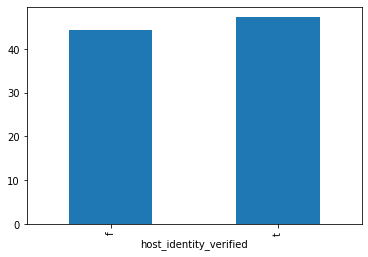

In [ ]:
cleaned_df.groupby('host_identity_verified').mean()['booking_rate(%)'].plot(kind='bar')

Verifying your identity might increase booking rate.

## How review ratings affect revenue and booking rate?

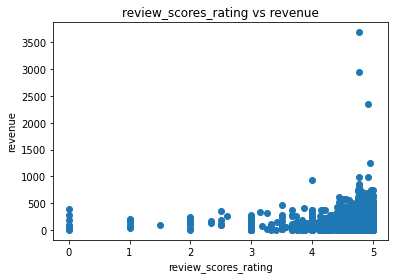

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(cleaned_df['review_scores_rating'],cleaned_df['revenue'])
plt.xlabel('review_scores_rating')
plt.ylabel('revenue')
plt.title('review_scores_rating vs revenue')
plt.show()

Rating above 4 might suggest higher revenue. Although all the values are saturated towards the end.

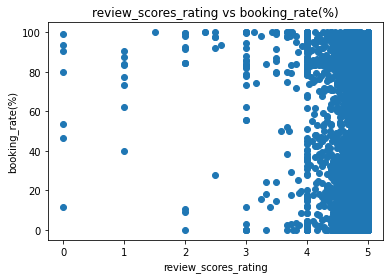

In [ ]:
plt.scatter(cleaned_df['review_scores_rating'],cleaned_df['booking_rate(%)'])
plt.xlabel('review_scores_rating')
plt.ylabel('booking_rate(%)')
plt.title('review_scores_rating vs booking_rate(%)')
plt.show()

All the values are saturated towards the end which makes it difficult to say whether having lower/higher review rating will affect booking rate based on the sample.

## Seasonal pattern

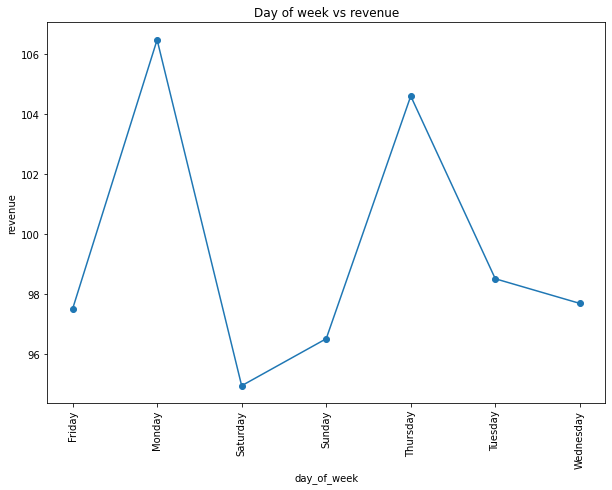

In [ ]:
cleaned_df['date'] = pd.to_datetime(cal['date'])

cleaned_df['day_of_week'] = cleaned_df['date'].dt.day_name()

revenu_per_week=cleaned_df.groupby('day_of_week').revenue.mean().reset_index()

plt.figure(figsize=(10,7))
plt.plot(revenu_per_week['day_of_week'],revenu_per_week['revenue'],marker='o')
plt.xticks(rotation=90)
plt.xlabel('day_of_week')
plt.ylabel('revenue')
plt.title('Day of week vs revenue')
plt.show()

In [ ]:
cleaned_df.drop(['date','day_of_week'],axis=1,inplace=True)

# **4. Feature Selection**

In [ ]:
cleaned_df.info()
import numpy as np

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 5354
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_location                5355 non-null   object 
 1   host_response_time           5355 non-null   object 
 2   host_response_rate           5355 non-null   float64
 3   host_acceptance_rate         5355 non-null   float64
 4   host_is_superhost            5355 non-null   object 
 5   host_neighbourhood           5355 non-null   object 
 6   host_total_listings_count    5355 non-null   int64  
 7   host_verifications           5355 non-null   object 
 8   host_identity_verified       5355 non-null   object 
 9   neighbourhood                5355 non-null   object 
 10  property_type                5355 non-null   object 
 11  room_type                    5355 non-null   object 
 12  bedrooms                     5355 non-null   float64
 13  minimum_nights    

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

In [ ]:
#host_location,host_neighbourhood,property_type,bathrooms_text,neighbourhood
#These features may cause curse of dimensionality
#So taking only top N features
#Considering rest of categories as noise we impute them with 0

In [ ]:
top_5 = [x for x in cleaned_df.host_location.value_counts().sort_values(ascending=False).head(5).index]
for label in top_5:
      cleaned_df[label] = np.where(cleaned_df['host_location']==label,1,0)
cleaned_df[['host_location']+top_5]
cleaned_df.drop('host_location',axis=1,inplace=True)

In [ ]:
top_10 = [x for x in cleaned_df.host_neighbourhood.value_counts().sort_values(ascending=False).head(10).index]
for label in top_10:
      cleaned_df[label] = np.where(cleaned_df['host_neighbourhood']==label,1,0)
cleaned_df[['host_neighbourhood']+top_10]
cleaned_df.drop('host_neighbourhood',axis=1,inplace=True)

In [ ]:
top_5 = [x for x in cleaned_df.property_type.value_counts().sort_values(ascending=False).head(5).index]
for label in top_5:
      cleaned_df[label] = np.where(cleaned_df['property_type']==label,1,0)
cleaned_df[['property_type']+top_5]
cleaned_df.drop('property_type',axis=1,inplace=True)

In [ ]:
top_7 = [x for x in cleaned_df.bathrooms_text.value_counts().sort_values(ascending=False).head(7).index]
for label in top_7:
      cleaned_df[label] = np.where(cleaned_df['bathrooms_text']==label,1,0)
cleaned_df[['bathrooms_text']+top_7]
cleaned_df.drop('bathrooms_text',axis=1,inplace=True)

In [ ]:
top_5 = [x for x in cleaned_df.neighbourhood.value_counts().sort_values(ascending=False).head(5).index]
for label in top_5:
      cleaned_df[label] = np.where(cleaned_df['neighbourhood']==label,1,0)
cleaned_df[['neighbourhood']+top_5]
cleaned_df.drop('neighbourhood',axis=1,inplace=True)

**Create dummies**

In [ ]:
dummy_airbnb=pd.get_dummies(cleaned_df,drop_first=True)

In [ ]:
dummy_airbnb.shape

(5355, 78)

In [ ]:
X_revenue = dummy_airbnb.drop(['revenue','booking_rate(%)'],axis=1)
y_revenue = dummy_airbnb.revenue

AdaBoost for feature selection

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0)
params = {'n_estimators' : [50,100],'learning_rate':[0.3,0.6,1]}
kfold = KFold(n_splits=5,shuffle=True,random_state=2022)

gcv = GridSearchCV(regr,param_grid=params,scoring='r2',cv=kfold,verbose=3)
gcv.fit(X_revenue,y_revenue)

print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.3, n_estimators=50;, score=0.861 total time=   1.2s
[CV 2/5] END learning_rate=0.3, n_estimators=50;, score=0.809 total time=   1.2s
[CV 3/5] END learning_rate=0.3, n_estimators=50;, score=0.832 total time=   1.1s
[CV 4/5] END learning_rate=0.3, n_estimators=50;, score=0.837 total time=   1.1s
[CV 5/5] END learning_rate=0.3, n_estimators=50;, score=0.836 total time=   1.1s
[CV 1/5] END learning_rate=0.3, n_estimators=100;, score=0.864 total time=   2.1s
[CV 2/5] END learning_rate=0.3, n_estimators=100;, score=0.806 total time=   2.0s
[CV 3/5] END learning_rate=0.3, n_estimators=100;, score=0.835 total time=   2.0s
[CV 4/5] END learning_rate=0.3, n_estimators=100;, score=0.842 total time=   2.1s
[CV 5/5] END learning_rate=0.3, n_estimators=100;, score=0.819 total time=   2.8s
[CV 1/5] END learning_rate=0.6, n_estimators=50;, score=0.884 total time=   1.9s
[CV 2/5] END learning_rate=0.6, n_estimators

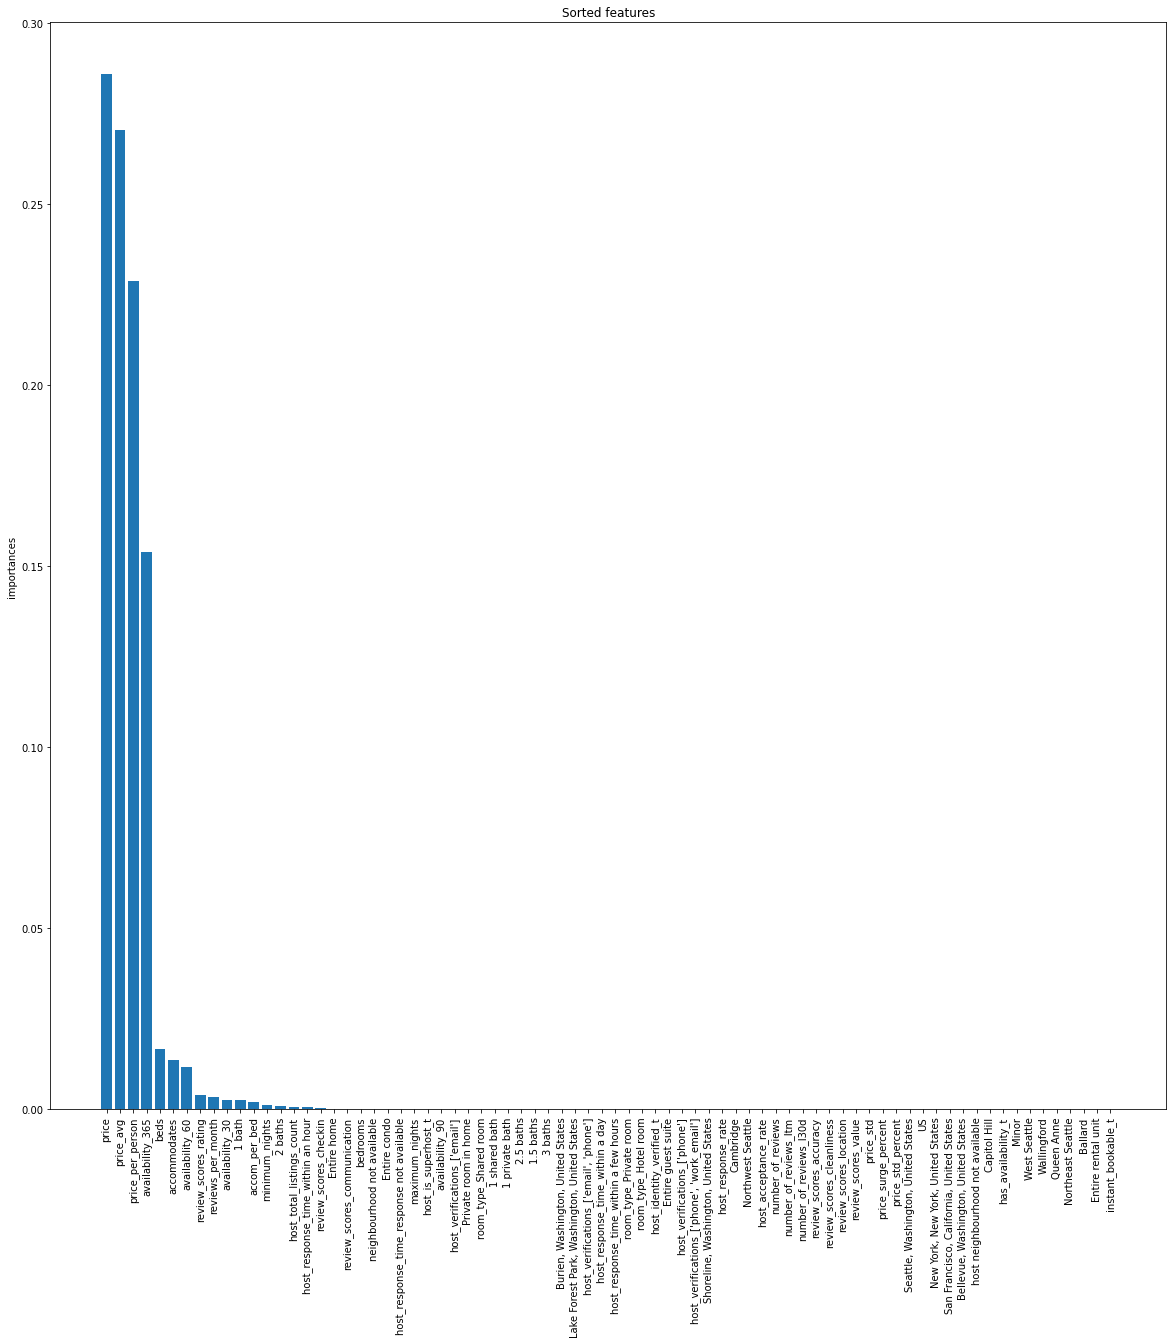

In [ ]:
# Sorted Imp Plot
plt.figure(figsize=(20,20))
best_model = gcv.best_estimator_
col_names=X_revenue.columns
importance = best_model.feature_importances_
#sorted plot
neg_imp=-1*importance
i_desc_sorted=neg_imp.argsort()
imp_sorted=importance[i_desc_sorted]
col_sorted=col_names[i_desc_sorted]
plt.title('Sorted features')
plt.bar(col_sorted,imp_sorted)
plt.xticks(rotation=90)
plt.ylabel('importances')
plt.show()

In [ ]:
selected_features = col_sorted[:20]

In [ ]:
selected_features

Index(['price', 'price_avg', 'price_per_person', 'availability_365', 'beds',
       'accommodates', 'availability_60', 'review_scores_rating',
       'reviews_per_month', 'availability_30', '1 bath', 'accom_per_bed',
       'minimum_nights', '2 baths', 'host_total_listings_count',
       'host_response_time_within an hour', 'review_scores_checkin',
       'Entire home', 'review_scores_communication', 'bedrooms'],
      dtype='object')

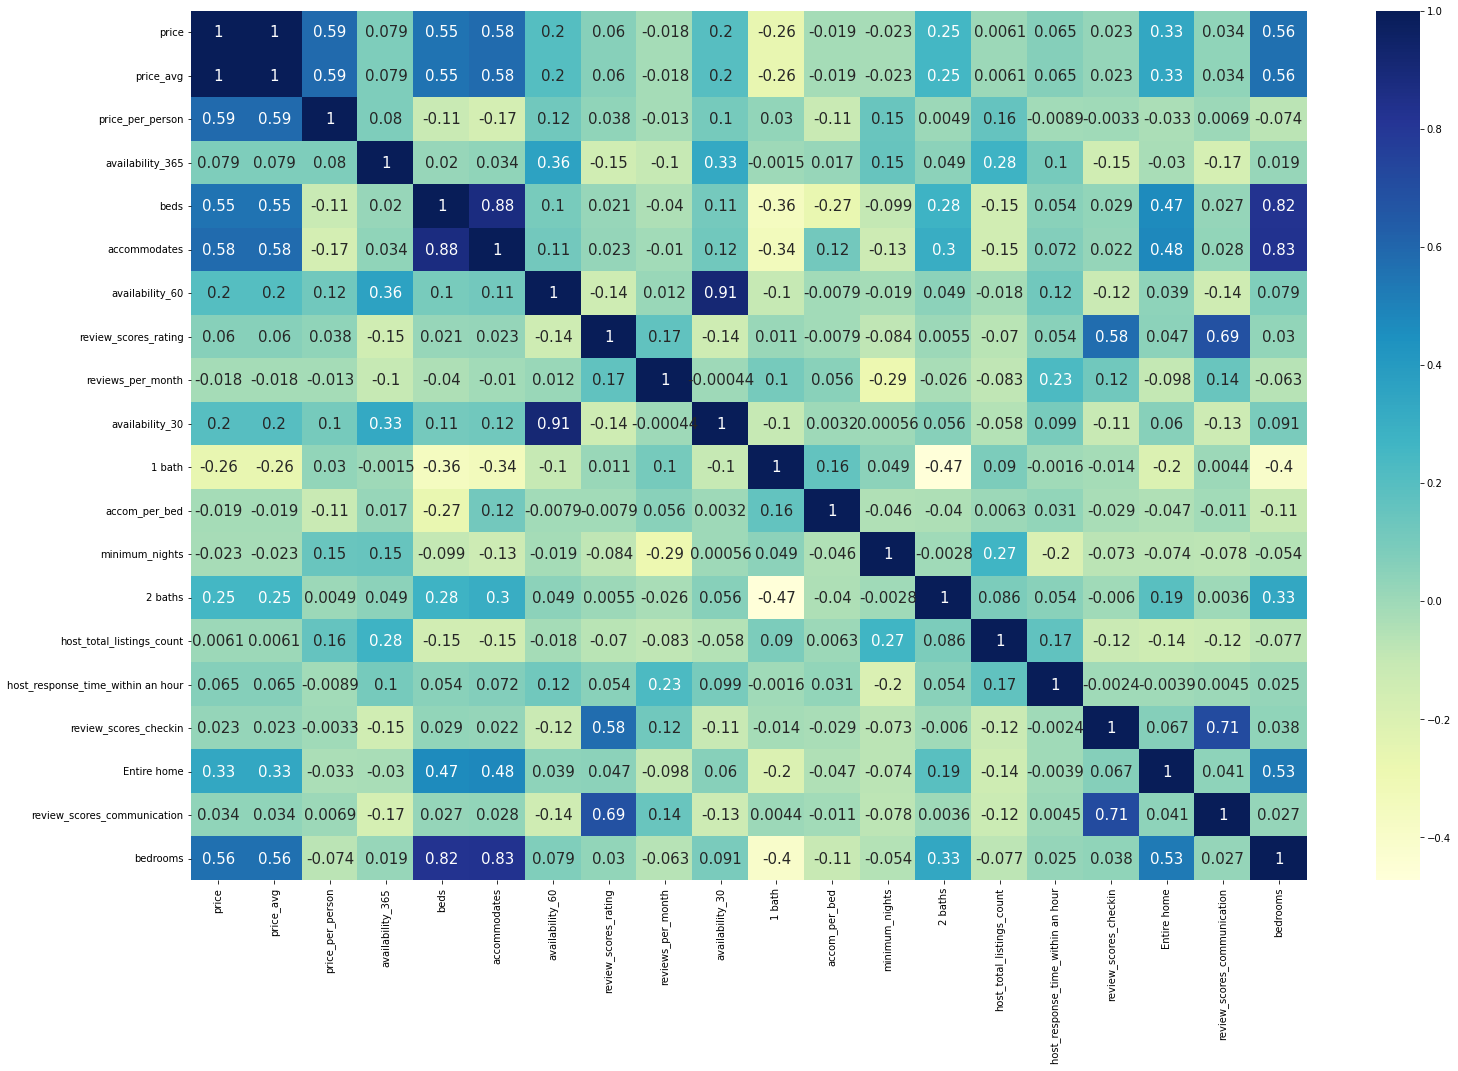

In [ ]:
plt.figure(figsize=(25,16))
sns.heatmap(dummy_airbnb[selected_features].corr(),annot=True,cmap="YlGnBu",annot_kws={'size': 15},cbar=True)
plt.show()

# **5. Modeling**

In [ ]:
X_revenue = X_revenue[selected_features]

**DecisionTreeRegressor for model testing using selected_features**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022,max_depth=3)
kfold = KFold(n_splits=5,shuffle=True,random_state=2022)
params = {'max_depth':[None, 3, 5, 7],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 3, 10]}

gcv = GridSearchCV(dtr, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gcv.fit(X_revenue,y_revenue)
print(gcv.best_params_)        
print(gcv.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.941 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.965 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.874 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.881 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.970 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.963 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.967 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.723 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.888 total time=   0.0s
[CV 5/5] END max_dep

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import seaborn as sns

## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_revenue,y_revenue,test_size=0.3,random_state=2022)

s=StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)



## K Nearest Neighbors

Using accuracy score

In [ ]:
scores=[]
for k in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    #print('Executing for k=',k)
    y_pred=knn.predict(X_test_scaled)
    scores.append(r2_score(y_test,y_pred))

kmax_i=np.argmax(scores)

#print('Max accuracy:',scores[kmax_i],'for k=',kmax_i+2)

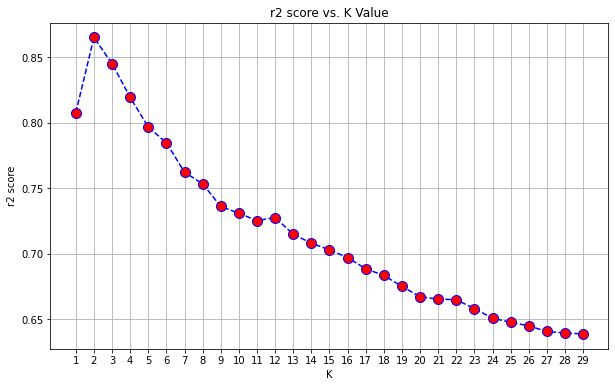

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),scores,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('r2 score vs. K Value')
plt.xlabel('K')
plt.ylabel('r2 score')
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [ ]:
error_rate=[]
for k in range(1,30):
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    #print('Executing for k=',k)
    y_pred=knn.predict(X_test_scaled)
    error_rate.append(mean_squared_error(y_pred, y_test))

kmin_i=np.argmin(scores)

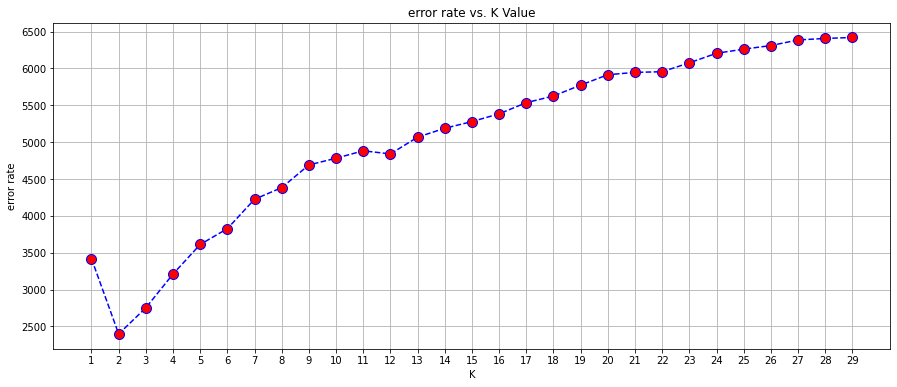

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error rate')
plt.xticks(range(1,30))
plt.grid()
plt.show()

After k = 2, r2 score is descreasing rapidly and error is increased. So we select k=2.

In [ ]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
print('r2 score : ',r2_score(y_test,y_pred))

r2 score :  0.8450578330169121


**r2 with GridSearchCV**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn=KNeighborsRegressor()
scaler=StandardScaler()

params={'n_neighbors':np.arange(1,30)}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gcv=GridSearchCV(knn, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gcv.fit(X_train_scaled,y_train)
print('Using KNN : ')
print('k = ',gcv.best_params_)
print('best score = ',gcv.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.782 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.611 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.770 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.635 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.660 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.826 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.751 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.780 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.647 total time=   0.1s
[CV 5/5] END .....................n_neighbors=2;, score=0.755 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.836 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

In [ ]:
best_model = gcv.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_pred=best_model.predict(X_test_scaled)
print('r2 score : ',r2_score(y_test,y_pred))

r2 score :  0.8650387882570747


**MAE with GridSearchCV**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

knn=KNeighborsRegressor()
scaler=StandardScaler()

params={'n_neighbors':np.arange(1,30)}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gcv=GridSearchCV(knn, param_grid=params,scoring='neg_mean_absolute_error',cv=kfold,verbose=3)
gcv.fit(X_train_scaled,y_train)
print('Using KNN : ')
print('k = ',gcv.best_params_)
print('best score = ',gcv.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ...................n_neighbors=1;, score=-30.388 total time=   0.0s
[CV 2/5] END ...................n_neighbors=1;, score=-33.624 total time=   0.0s
[CV 3/5] END ...................n_neighbors=1;, score=-30.157 total time=   0.0s
[CV 4/5] END ...................n_neighbors=1;, score=-29.758 total time=   0.0s
[CV 5/5] END ...................n_neighbors=1;, score=-31.331 total time=   0.0s
[CV 1/5] END ...................n_neighbors=2;, score=-26.853 total time=   0.0s
[CV 2/5] END ...................n_neighbors=2;, score=-28.657 total time=   0.0s
[CV 3/5] END ...................n_neighbors=2;, score=-28.032 total time=   0.0s
[CV 4/5] END ...................n_neighbors=2;, score=-26.446 total time=   0.0s
[CV 5/5] END ...................n_neighbors=2;, score=-28.024 total time=   0.0s
[CV 1/5] END ...................n_neighbors=3;, score=-25.578 total time=   0.0s
[CV 2/5] END ...................n_neighbors=3;,

In [ ]:
best_model = gcv.best_estimator_
best_model

KNeighborsRegressor(n_neighbors=4)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred=best_model.predict(X_test_scaled)
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  27.142605978978953


## **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:

## Linear Kernel

svm_l = SVR(kernel='linear')
params = {'C':np.linspace(0.001,3,5),
          'epsilon':np.linspace(0.001,3,5)}
gcv_svm = GridSearchCV(svm_l, param_grid=params,scoring='r2',cv=kfold,verbose=3)

gcv_svm.fit(X_train_scaled,y_train)

print('Best params: ',gcv_svm.best_params_)               
print('Best score: ',gcv_svm.best_score_)                

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ............C=0.001, epsilon=0.001;, score=0.012 total time=   0.5s
[CV 2/5] END ............C=0.001, epsilon=0.001;, score=0.014 total time=   0.5s
[CV 3/5] END ...........C=0.001, epsilon=0.001;, score=-0.015 total time=   0.4s
[CV 4/5] END ............C=0.001, epsilon=0.001;, score=0.014 total time=   0.4s
[CV 5/5] END ............C=0.001, epsilon=0.001;, score=0.015 total time=   0.4s
[CV 1/5] END ..........C=0.001, epsilon=0.75075;, score=0.012 total time=   0.4s
[CV 2/5] END ..........C=0.001, epsilon=0.75075;, score=0.013 total time=   0.4s
[CV 3/5] END .........C=0.001, epsilon=0.75075;, score=-0.017 total time=   0.4s
[CV 4/5] END ..........C=0.001, epsilon=0.75075;, score=0.013 total time=   0.4s
[CV 5/5] END ..........C=0.001, epsilon=0.75075;, score=0.015 total time=   0.4s
[CV 1/5] END ...........C=0.001, epsilon=1.5005;, score=0.013 total time=   0.4s
[CV 2/5] END ...........C=0.001, epsilon=1.5005

In [ ]:
###predicting on test data
y_pred = gcv_svm.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.7741136889359705


In [ ]:
svm_r = SVR()
params = {'C':np.linspace(0.001,3,5),
          'epsilon':np.linspace(0.001,3,5)}
gcv_svm_r = GridSearchCV(svm_r, param_grid=params,scoring='r2',cv=kfold,verbose=3)

gcv_svm_r.fit(X_train_scaled,y_train)

print('Best params: ',gcv_svm_r.best_params_)               
print('Best score: ',gcv_svm_r.best_score_)   

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...........C=0.001, epsilon=0.001;, score=-0.068 total time=   0.8s
[CV 2/5] END ...........C=0.001, epsilon=0.001;, score=-0.042 total time=   0.8s
[CV 3/5] END ...........C=0.001, epsilon=0.001;, score=-0.106 total time=   0.8s
[CV 4/5] END ...........C=0.001, epsilon=0.001;, score=-0.050 total time=   0.8s
[CV 5/5] END ...........C=0.001, epsilon=0.001;, score=-0.073 total time=   0.8s
[CV 1/5] END .........C=0.001, epsilon=0.75075;, score=-0.069 total time=   0.8s
[CV 2/5] END .........C=0.001, epsilon=0.75075;, score=-0.043 total time=   0.8s
[CV 3/5] END .........C=0.001, epsilon=0.75075;, score=-0.106 total time=   0.8s
[CV 4/5] END .........C=0.001, epsilon=0.75075;, score=-0.049 total time=   0.8s
[CV 5/5] END .........C=0.001, epsilon=0.75075;, score=-0.073 total time=   0.8s
[CV 1/5] END ..........C=0.001, epsilon=1.5005;, score=-0.069 total time=   0.8s
[CV 2/5] END ..........C=0.001, epsilon=1.5005;

In [ ]:
###predicting on test data
y_pred = gcv_svm_r.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.4401964023615146


## **XGBRegressor**

In [ ]:
model_xgb=XGBRegressor(random_state=2022)
params={'max_depth':[2,3,4,5,6],'n_estimators':[50,100],'learning_rate':[0.01,0.3,0.05,0.5,0.7]}
gcv_xgb=GridSearchCV(model_xgb,scoring='r2',param_grid=params,cv=kfold,verbose=3)
gcv_xgb.fit(X_train_scaled,y_train)
print('Best score  : ',gcv_xgb.best_score_)
print('Best params  : ',gcv_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[06:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.028 total time=   0.2s
[06:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.075 total time=   0.1s
[06:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=-0.044 total time=   0.1s
[06:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=50;, score=0.136 total time=   0.1s
[06:39:52] WARNING: /workspace/src/objective/regr

In [ ]:
y_pred = gcv_xgb.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.9331231728611318


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf=RandomForestRegressor(random_state=2022)
params={'max_features':[4,5,6],'max_depth':[3, 5, 7],'min_samples_split':[2, 5, 10],'min_samples_leaf':[1, 3, 10]}
gcv_rf = GridSearchCV(estimator=model_rf, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gcv_rf.fit(X_train_scaled,y_train)
print('Best parameters : ',gcv_rf.best_params_)
print('Best score : ',gcv_rf.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=2;, score=0.687 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=2;, score=0.554 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=2;, score=0.629 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=2;, score=0.490 total time=   0.2s
[CV 5/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=2;, score=0.662 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=5;, score=0.689 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=5;, score=0.554 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=4, min_samples_leaf=1, min_samples_split=5;, score=0.632 total time=   0.2s
[CV 4/5] END max_d

In [ ]:
y_pred = gcv_rf.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.9481274541889839


## **Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [ ]:
model_lr=LinearRegression()
params={'fit_intercept': [True]}
gcv_lr = GridSearchCV(estimator=model_lr, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gcv_lr.fit(X_train_scaled,y_train)
print('R2 score: ',gcv_lr.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................fit_intercept=True;, score=0.824 total time=   0.0s
[CV 2/5] END ................fit_intercept=True;, score=0.851 total time=   0.0s
[CV 3/5] END ................fit_intercept=True;, score=0.809 total time=   0.0s
[CV 4/5] END ................fit_intercept=True;, score=0.802 total time=   0.0s
[CV 5/5] END ................fit_intercept=True;, score=0.748 total time=   0.0s
R2 score:  0.8068319637301892


In [ ]:
y_pred = gcv_lr.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8064493663682433


## **Regularization**

### Ridge

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
model_ridge=Ridge()
params={'alpha':np.arange(0.1,2,0.2)}
gsv_ridge=GridSearchCV(model_ridge, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gsv_ridge.fit(X_train_scaled,y_train)
print('Best params: ',gsv_ridge.best_params_)
print('Best score ',gsv_ridge.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........................alpha=0.1;, score=0.824 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.851 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.808 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.802 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.748 total time=   0.0s
[CV 1/5] END .........alpha=0.30000000000000004;, score=0.824 total time=   0.0s
[CV 2/5] END .........alpha=0.30000000000000004;, score=0.851 total time=   0.0s
[CV 3/5] END .........alpha=0.30000000000000004;, score=0.808 total time=   0.0s
[CV 4/5] END .........alpha=0.30000000000000004;, score=0.802 total time=   0.0s
[CV 5/5] END .........alpha=0.30000000000000004;, score=0.748 total time=   0.0s
[CV 1/5] END ..........alpha=0.5000000000000001;, score=0.824 total time=   0.0s
[CV 2/5] END ..........alpha=0.5000000000000001;

In [ ]:
y_pred = gsv_ridge.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.80647715170253


### Lasso

In [ ]:
model_lasso=Lasso()
params={'alpha':np.arange(0.1,2,0.2)}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gsv_lasso=GridSearchCV(model_lasso, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gsv_lasso.fit(X_train_scaled,y_train)
print('Best params: ',gsv_lasso.best_params_)
print('Best score: ',gsv_lasso.best_score_)

In [ ]:
y_pred = gsv_lasso.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8073488211466131


### **Polynomial**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

 **Poly-Ridge with r2 score**

In [ ]:
ridge=Ridge()
poly=PolynomialFeatures()
pipe=Pipeline([('poly',poly),('rdge',ridge)])
params={'rdge__alpha':np.arange(0.1,2,0.1),'poly__degree':[1,2]}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gsv_red_pol=GridSearchCV(pipe, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gsv_red_pol.fit(X_train_scaled,y_train)
print('Best ridge params ',gsv_red_pol.best_params_['rdge__alpha'])
print('Best ridge params :',gsv_red_pol.best_params_['poly__degree'])
print('Best score ',gsv_red_pol.best_score_)

In [ ]:
y_pred = gsv_red_pol.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.8064771517025301


In [ ]:
best_model = gsv_red_pol.best_estimator_
best_model

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('rdge', Ridge(alpha=1.9000000000000001))])

In [ ]:
'''
import pickle
picklefile = open('/content/sample_data/poly.model', 'wb')
    #pickle the dictionary and write it to file
pickle.dump(best_model, picklefile)
    #close the file
picklefile.close()
'''

**Poly-Ridge with MAE**

In [ ]:
ridge=Ridge()
poly=PolynomialFeatures()
pipe=Pipeline([('poly',poly),('rdge',ridge)])
params={'rdge__alpha':np.arange(0.1,2,0.1),'poly__degree':[1,2]}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gsv_red_pol=GridSearchCV(pipe, param_grid=params,scoring='neg_mean_absolute_error',cv=kfold,verbose=3)
gsv_red_pol.fit(X_train_scaled,y_train)
print('Best ridge params ',gsv_red_pol.best_params_['rdge__alpha'])
print('Best ridge params :',gsv_red_pol.best_params_['poly__degree'])
print('Best score ',gsv_red_pol.best_score_)

In [ ]:
y_pred = gsv_red_pol.predict(X_test_scaled)

print('MAE score: ',mean_absolute_error(y_test,y_pred))

MAE score:  6.18878609306622


**Poly-Lasso with r2 score**

In [ ]:
lasso=Lasso()
poly=PolynomialFeatures()
pipe_pol_lso=Pipeline([('poly',poly),('lso',lasso)])
params={'lso__alpha':np.arange(0.1,1,0.2),'poly__degree':[2,3]}
kfold=KFold(n_splits=3,shuffle=True,random_state=2022)
gsv_pol_lso=GridSearchCV(pipe_pol_lso, param_grid=params,scoring='r2',cv=kfold,verbose=3)
gsv_pol_lso.fit(X_train_scaled,y_train)
print('Best lasso params ',gsv_pol_lso.best_params_['lso__alpha'])
print('Best Poly params:',gsv_pol_lso.best_params_['poly__degree'])
print(' best score ',gsv_pol_lso.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
y_pred = gsv_pol_lso.predict(X_test_scaled)

print('R2 score: ',r2_score(y_test,y_pred))

R2 score:  0.9912916414555519


**Poly-Lasso with MAE**

In [ ]:
lasso=Lasso()
poly=PolynomialFeatures()
pipe_pol_lso_mae=Pipeline([('poly',poly),('lso',lasso)])
params={'lso__alpha':np.arange(0.1,2,0.1),'poly__degree':[1,2,3]}
kfold=KFold(n_splits=5,shuffle=True,random_state=2022)
gsv_pol_lso_mae=GridSearchCV(pipe_pol_lso_mae, param_grid=params,scoring='neg_mean_absolute_error',cv=kfold,verbose=3)
gsv_pol_lso_mae.fit(X_train_scaled,y_train)
print('Best lasso params ',gsv_pol_lso_mae.best_params_['lso__alpha'])
print('Best Poly params:',gsv_pol_lso_mae.best_params_['poly__degree'])
print(' best score ',gsv_pol_lso_mae.best_score_)

Fitting 5 folds for each of 57 candidates, totalling 285 fits
[CV 1/5] END ..lso__alpha=0.1, poly__degree=1;, score=-32.245 total time=   0.0s
[CV 2/5] END ..lso__alpha=0.1, poly__degree=1;, score=-31.433 total time=   0.0s
[CV 3/5] END ..lso__alpha=0.1, poly__degree=1;, score=-30.821 total time=   0.0s
[CV 4/5] END ..lso__alpha=0.1, poly__degree=1;, score=-30.201 total time=   0.0s
[CV 5/5] END ..lso__alpha=0.1, poly__degree=1;, score=-30.423 total time=   0.0s
[CV 1/5] END ...lso__alpha=0.1, poly__degree=2;, score=-5.511 total time=   0.7s
[CV 2/5] END ...lso__alpha=0.1, poly__degree=2;, score=-8.725 total time=   0.4s
[CV 3/5] END ...lso__alpha=0.1, poly__degree=2;, score=-5.404 total time=   0.7s
[CV 4/5] END ...lso__alpha=0.1, poly__degree=2;, score=-5.333 total time=   0.7s
[CV 5/5] END ...lso__alpha=0.1, poly__degree=2;, score=-5.180 total time=   0.7s
[CV 1/5] END ...lso__alpha=0.1, poly__degree=3;, score=-4.640 total time=   7.4s
[CV 2/5] END ..lso__alpha=0.1, poly__degree=3;,

In [ ]:
y_pred = gsv_pol_lso_mae.predict(X_test_scaled)

print('MAE score: ',mean_absolute_error(y_test,y_pred))

MAE score:  5.505265568879492
